In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Churn_Modelling (1).csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [8]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [9]:
X = df.drop(columns = ['Exited'])
Y = df['Exited']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [15]:
X_train_trf

array([[-0.34459497, -0.65674999, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ...,  1.73734559,
        -0.57779016, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57559072,
        -0.57779016,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57559072,
        -0.57779016, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ...,  1.73734559,
        -0.57779016,  0.91055421]])

In [16]:
X_test_trf

array([[-0.5836166 , -0.65674999, -0.68894811, ...,  1.73734559,
        -0.57779016,  0.91055421],
       [-0.30302599,  0.39028611, -1.38250341, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-0.53165538,  0.48547121, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       ...,
       [-0.44851742, -0.65674999,  0.69816249, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-0.74989252, -0.75193509, -1.03572576, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-1.23832804, -1.60860099,  1.73849544, ...,  1.73734559,
        -0.57779016, -1.09823226]])

In [17]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

In [19]:
model.add(Dense(3,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 11)                44        
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit(X_train_trf,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8611 - val_loss: 0.3480 - val_accuracy: 0.8521
Epoch 2/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8607 - val_loss: 0.3486 - val_accuracy: 0.8521
Epoch 3/100
175/175 [==============================] - 1s 5ms/step - loss: 0.3430 - accuracy: 0.8625 - val_loss: 0.3489 - val_accuracy: 0.8521
Epoch 4/100
175/175 [==============================] - 1s 7ms/step - loss: 0.3420 - accuracy: 0.8618 - val_loss: 0.3482 - val_accuracy: 0.8536
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3421 - accuracy: 0.8611 - val_loss: 0.3480 - val_accuracy: 0.8543
Epoch 6/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3422 - accuracy: 0.8618 - val_loss: 0.3485 - val_accuracy: 0.8507
Epoch 7/100
175/175 [==============================] - 1s 5ms/step - loss: 0.3425 - accuracy: 0.8621 - val_loss: 0.3468 - val_accuracy: 0.8493

Epoch 58/100
175/175 [==============================] - 1s 6ms/step - loss: 0.3404 - accuracy: 0.8627 - val_loss: 0.3448 - val_accuracy: 0.8543
Epoch 59/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8607 - val_loss: 0.3443 - val_accuracy: 0.8550
Epoch 60/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.8614 - val_loss: 0.3451 - val_accuracy: 0.8521
Epoch 61/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8612 - val_loss: 0.3442 - val_accuracy: 0.8529
Epoch 62/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8611 - val_loss: 0.3453 - val_accuracy: 0.8514
Epoch 63/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3400 - accuracy: 0.8623 - val_loss: 0.3463 - val_accuracy: 0.8550
Epoch 64/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3398 - accuracy: 0.8618 - val_loss: 0.3447 - val_accuracy:

In [30]:
model.layers[0].get_weights()

[array([[ 0.06085348,  0.02805655, -0.02722807],
        [-1.0598804 , -0.42542312, -0.16985063],
        [-0.03510206, -0.06531947, -0.05240702],
        [ 0.02054592, -0.16056858,  0.3992917 ],
        [ 0.09360418, -1.0207832 ,  1.3559867 ],
        [-0.05859084, -0.08106584, -0.06251884],
        [-0.46764538, -0.66534203, -0.4906794 ],
        [-0.02215597, -0.02626367, -0.03218842],
        [-0.07197615,  0.16355425, -0.0915345 ],
        [-0.11994816, -0.10946988,  0.01763756],
        [ 0.04776412, -0.06782838, -0.14486119]], dtype=float32),
 array([ 1.398663  ,  1.1231897 , -0.08936062], dtype=float32)]

In [31]:
y_log = model.predict(X_test_trf)

94/94 [==============================] - 0s 2ms/step


In [32]:
y_pred = np.where(y_log>0.5,1,0)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_pred,Y_test)

0.8676666666666667

In [35]:
history.history

{'loss': [0.3422917425632477,
  0.3424778878688812,
  0.3430275619029999,
  0.3419947028160095,
  0.3420623540878296,
  0.34215930104255676,
  0.3425135016441345,
  0.34220877289772034,
  0.3421783745288849,
  0.34193041920661926,
  0.342061311006546,
  0.34167540073394775,
  0.3419106900691986,
  0.3420882523059845,
  0.3416924774646759,
  0.34167227149009705,
  0.3414817750453949,
  0.3417889177799225,
  0.34156858921051025,
  0.3415302038192749,
  0.34133511781692505,
  0.34157228469848633,
  0.341742604970932,
  0.3417690694332123,
  0.3416755795478821,
  0.3409574329853058,
  0.3411256968975067,
  0.3412344455718994,
  0.3419012725353241,
  0.34155887365341187,
  0.341843843460083,
  0.34135952591896057,
  0.3411213755607605,
  0.3411303162574768,
  0.34057527780532837,
  0.34161508083343506,
  0.3407132923603058,
  0.3412255048751831,
  0.3409557342529297,
  0.34181880950927734,
  0.3410663902759552,
  0.340626060962677,
  0.34124627709388733,
  0.34091511368751526,
  0.340698808

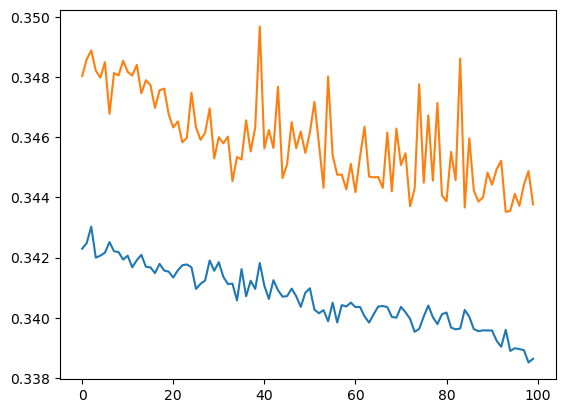

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

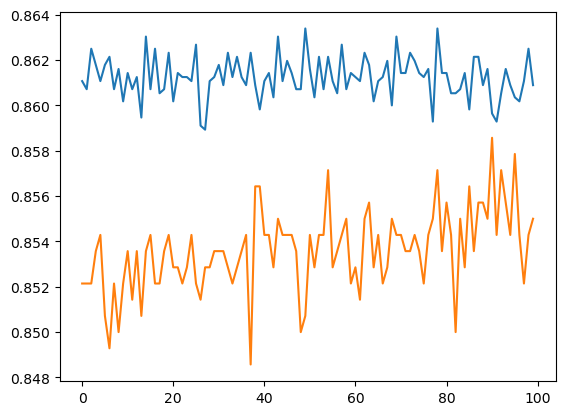

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])